# Classification-Based Linear Surrogate Modeling of Constraints for AL-CMA-ES

In [1]:
from IPython.core.display import HTML
styles = open("./style/custom.css").read()
HTML(styles)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.alls_cma_es import optimize
from src.problems import Dufosse2021
from src.utils import find_feasible_x0
import numpy as np

## Usage

In [4]:
dim = 20
x0 = [-1] + [0]*(dim-1)
sigma0 = 1
m = 1
cond = 1e6
rotated = False
f, constraint = Dufosse2021(dim, m = m, condition_number=cond, binary=False, rotation=rotated, linear_step=False, easy_constraints=False).get()
if np.max(constraint(x0)) > 0:
    x0 = find_feasible_x0(x0, constraint)
    print("New x0:", x0)

In [5]:
# Options for ALLS-CMA-ES
surrogate_opts = {

}

# Options to be passed to cma.EvolutionStrategy constructor
cma_opts={
        'tolstagnation': np.inf,
        'verb_disp_overwrite': 1,
        'conditioncov_alleviate': [0],
        'maxiter': 1500
}

es, cfun = optimize(
    f,
    constraint,
    x0,
    sigma0,
    surrogate_opts,
    cma_opts,
    logging=True
)

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=436913, Fri Apr 11 18:38:16 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 1.728672545229807e+05 1.1e+00 9.44e-01  9e-01  1e+00 0:00.0
    3     36 -1.498409709833089e+11 1.1e+00 8.69e-01  9e-01  9e-01 0:00.0

/opt/miniconda3/lib/python3.12/site-packages/cma/constraints_handler.py:1001: UserWarning: iqr(f), iqr(G), iqr(G**2)) == 7332749.412766302, [0.], [0.]
  _warnings.warn("iqr(f), iqr(G), iqr(G**2)) == %s, %s, %s" % (str(df), str(dG), str(dG2)))


 1500  18000 1.000000000000000e+06 2.4e+04 3.63e-07  6e-11  1e-06 0:03.4
termination on maxiter=1500
final/bestever f-value = 1.000000e+06 -1.011627e+12 after 18000/219 evaluations
incumbent solution: [ 6.94486653e-11 -7.60797358e-10 -9.84182065e-09 -9.52885522e-10
 -1.87699387e-08 -2.09064058e-08  3.02599163e-08  1.80915576e-08 ...]
std deviations: [5.83804740e-11 2.10140841e-09 3.36536801e-09 4.68438599e-09
 5.80025907e-09 9.21555640e-09 1.19663403e-08 1.86168789e-08 ...]
SURROGATE 0
gradient = [ 1.00000000e+00  4.75533724e-16 -1.69884499e-16  1.24103950e-16
 -1.69151862e-18  1.33701749e-16  1.10336002e-16 -9.11368546e-17 ...]
intercept = -1.7418073579652012e-24
n_updates = 1499
g-calls: 14854


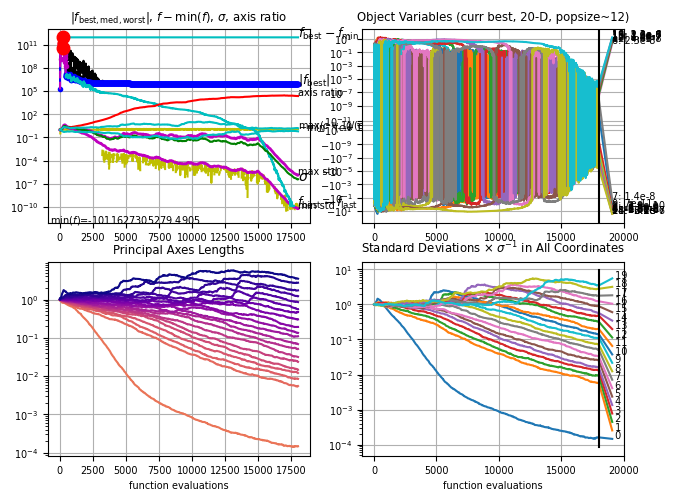

In [6]:
es.plot(xsemilog=True)